# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Free-energy-profile-for-RNA-duplex-formation" data-toc-modified-id="Free-energy-profile-for-RNA-duplex-formation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Free energy profile for RNA duplex formation</a></div><div class="lev1 toc-item"><a href="#Prepare-calculation" data-toc-modified-id="Prepare-calculation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare calculation</a></div><div class="lev1 toc-item"><a href="#Solve-DHAMed-equations" data-toc-modified-id="Solve-DHAMed-equations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Solve DHAMed equations</a></div><div class="lev1 toc-item"><a href="#References" data-toc-modified-id="References-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>References</a></div>

In [1]:
import numpy as np
%matplotlib inline
import sys
sys.path.append("../")
from optimize_dhamed import *

# Free energy profile for RNA duplex formation

We have run coarse-grained simulations of RNA duplex formation with the oxRNA model (https://dna.physics.ox.ac.uk/index.php/RNA_model_introduction). 

# Prepare calculation

Load transition count matrix and bias potentials. 

In [2]:
c_l = [np.genfromtxt("count_matrix_1.txt")]

In [3]:
v_ar = np.genfromtxt("wfile.txt")[:,1].reshape((9,1))

In [4]:
v_ar.shape

(9, 1)

# Solve DHAMed equations

Solve DHAMed equations for Umbrella Sampling simulations of coarse grained RNA duplex formation. 

In [5]:
og = run_dhamed(c_l, -np.log(v_ar))

36
loglike-start 307329.006201
307329.006201
Optimization terminated successfully.
         Current function value: 288165.226259
         Iterations: 22
         Function evaluations: 27
         Gradient evaluations: 27
time elapsed 0.675587177277 s


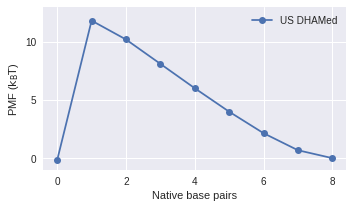

In [6]:
rna_pmf = og*-1 - (og[-1]*-1)

fig, ax = plt.subplots(figsize=(5,3))

rc = np.arange(0,9)
ax.plot(rc,rna_pmf, "o-", label="US DHAMed")

ax.set_xlabel("Native base pairs")
ax.set_ylabel("PMF ($\mathrm{k_BT}$)")
ax.set_ylim(-1,13)
ax.set_xlim(-0.4,8.4)
ax.set_yticks([0,5,10])
ax.set_xticks([0,2,4,6,8])
ax.tick_params(direction='out')

ax.legend()
fig.tight_layout() 
fig.savefig("rna_pmf.png")
fig.savefig("rna_pmf.pdf")

The figure reproduces the free energy profile presented in Figure 7B of the manuscript [1].

# References

[1] Dynamic Histogram Analysis To Determine Free Energies and Rates from biased 
Simulations, L. S. Stelzl, A. Kells, E. Rosta, G. Hummer, J. Chem. Theory Comput.,
2917, http://pubs.acs.org/doi/abs/10.1021/acs.jctc.7b00373